# Neural Networks in Keras with MNIST

**Time**
- Teaching: FILLME
- Challenges: FILLME

**Questions**
- "How to we load and get context for input data in deep learning?"
- "How can we use keras to design custom neural network architectures?"

**Learning Objectives**
- "Understand the data format of inputs to neural networks."
- "The ability to implement, troubleshoot, and modify your own neural networks."

* * * * *

## Install packages
TODO

## Import packages
After installation is complete, we now are able to import the keras library. In order to simplify the syntax we will specifically import the functions we need from keras modules.

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import to_categorical

# Note you may get a warning about CUDA and GPU set up
# You can ignore these for now

2022-02-07 15:19:31.154104: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-07 15:19:31.154216: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


We also need to import packages to help us with visualizing and manipulating out data. Remember, this is half the battle!

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Keras and MNIST

Keras, Tensorflow, and MNIST, oh my! 

#### Keras
A deep-learning framework with a user-friendly API built for researchers to quickly prototype models developed by google.

#### Tensorflow
A backend engine for Keras developed by google.

#### MNIST
A dataset of 60,000 training images and 10,000 test images of handwritten digits. It is often considered the "hello world" of deep learning.

#### Problem Statement

You work for a bank and they need to automate the processing of reading mobile check deposits. 

At they moment they have overworked staff, looking at each photo of the checks and manually inputting the check number, account number, and amount of money. 

Can we make their life easier!?

<img src="https://www.usglobalmail.com/wp-content/uploads/2016/12/check-deposits.png" width="600" />

#### Our Solution

We will build a model that can correctly identify numbers from a picture!

As a first pass, we want to build a model that can identify a single handwritten digit, and produce the correct target digit class.

Let's dive right in and build a neural network model with keras that is able identify handwritten digits. 

## Input Data 

Getting data in the right format is a non-trivial and critical task when configuring building neural networks!

### Reading in the data

In [3]:
def get_mnist_data(subset=True):
    """
    Returns the MNIST dataset in a a tuple of size 6:
    (x_train, y_train, x_val, y_val, x_test, y_test)
    
    When subset=TRUE:
    Returns only a subset of the mnist dataset.
    Especially important to use if you are on datahub and only have 1-2GB of memory.
    """
    
    if subset:
        N_TRAIN = 5000
        N_VALIDATION = 1000
        N_TEST = 1000
    else:
        N_TRAIN = 48000
        N_VALIDATION = 12000
        N_TEST = 10000
    
    (x_train_and_val, y_train_and_val), (x_test, y_test) = mnist.load_data()
    
    x_train = x_train_and_val[:N_TRAIN,:,:]
    y_train = y_train_and_val[:N_TRAIN]
    
    x_val = x_train_and_val[N_TRAIN: N_TRAIN + N_VALIDATION,:,:]
    y_val = y_train_and_val[N_TRAIN: N_TRAIN + N_VALIDATION]
    
    x_test = x_test[:N_TEST]
    y_test = y_test[:N_TEST]
    
    return x_train, y_train, x_val, y_val, x_test, y_test
    
    

In [4]:
# Extract data from the tuple
x_train, y_train, x_val, y_val, x_test, y_test = get_mnist_data(subset=True)

### Understanding the data

In [5]:
def data_summary(data):
    """
    Takes a list of our data partitions and returns the shape.
    """
    
    for i, data_partition in enumerate(data):
        if i == 0:
            print("Training Data")
        elif i == 2:
            print()
            print("Validation Data")
        elif i == 4:
            print()
            print("Testing Data")

        print(f"Shape: {data_partition.shape}")
    
    

In [6]:
data_summary([x_train, y_train, x_val, y_val, x_test, y_test])

Training Data
Shape: (5000, 28, 28)
Shape: (5000,)

Validation Data
Shape: (1000, 28, 28)
Shape: (1000,)

Testing Data
Shape: (1000, 28, 28)
Shape: (1000,)


## Challenge 1: Understanding the Input Data

1. Why do we use split our data into train/validation/test?
2. What is the shape of our input data partitions?
3. What is the type of the data?

**BONUS:**

4. What is the distribution of the target classes within the data, is it balanced?

### Understanding and visualizing the images

Let's extract just one example from the training data

In [7]:
one_image = x_train[0]

Let's look inside and see how it's stored!

In [8]:
one_image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Not very helpful to see the data in it's raw format 

Instead, let's utilize the shape attribute and matplotlib to help us visualize this image data!

In [9]:
one_image.shape

(28, 28)

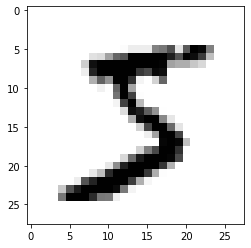

In [10]:
plt.imshow(one_image, cmap=plt.cm.binary);

Which dimension represent rows vs. columns in our image?

Let's find out through a test by grabbing all of the first dimension, and half of the second.

If the image is cutoff column-wise, we know the dimensions are (row pixel, column pixel)

In [11]:
one_image_first_dimension = one_image[:,0:14]

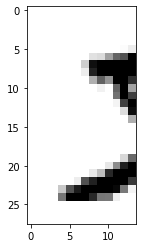

In [12]:
plt.imshow(one_image_first_dimension, cmap=plt.cm.binary);

So now we feel solid with our input data format!

The X data has 3 dimensions (index for images, pixel row, pixel column)

### Building a Neural Network in Keras

First we define our neural network architecture.

In [13]:
first_network = Sequential()
first_network.add(Dense(64, activation= "relu", input_shape=(28*28,)))
first_network.add(Dense(10, activation="softmax"))

2022-02-07 15:19:38.040856: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-07 15:19:38.040923: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-07 15:19:38.040949: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (jupyter-seanperez): /proc/driver/nvidia/version does not exist
2022-02-07 15:19:38.042187: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


We define a simple neural network with a single "hidden" layer, not very *deep*.

We can check out a summary of our model layout with the method `model_object.summary()`

In [14]:
first_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


Even this TINY neural network has over 50,000 parameters!

Next we need to give the model:
1. An optimizer strategy
2. A way to calculate loss
3. The metric we want to get out during training.

In [15]:
first_network.compile(optimizer = 'rmsprop', 
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

Lastly, we train the model using the `model_name.fit()` method

If you run the code below.... you would find that the model would fail to train. I do not suggest running it to save memory!

In [16]:
#history = first_network.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_val, y_val))

Remember that half the battle with model training is understanding what format we need the data in!

We won't go over this in too much detail, but in a snapshot we will:
1. Flatten the pixel dimensions from (28,28) into a single dimension (784)
2. Change x data type from integer with pixel values \[0, 225\] to a float values \[0,1\].
3. Expand the y targets from a single dimension with values \[0:9\] to 10 dimensions each representing a target class. 
    - In each row, the target class column will have a value of 1, while the other columns will have a value of 0
    - This is known as One Hot Encoding!
 

In [17]:
def transform_data(xdata, ydata):
    """
    Deletes the current data partitions.
    Reads in MNIST data.
    Transforms image data:
        1. Flattens pixel dimensions from 2 -> 1
        2. Scales pixel values between [0,1]
    """
    
    x = {}
    for name, partition in zip(["x_train", "x_val", "x_test"],xdata):
        flatten = partition.reshape((partition.shape[0], 28 * 28))
        scaled = flatten.astype('float32') / 255
        x[name] = scaled
    
    y = {}
    for name, partition in zip(["y_train", "y_val", "y_test"],ydata):
        y[name] = to_categorical(partition)
    
    return x['x_train'], y['y_train'], x['x_val'], y['y_val'], x['x_test'], y['y_test']

In [18]:
x_train_trans, y_train_trans, x_val_trans, y_val_trans, x_test_trans, y_test_trans = transform_data([x_train, x_val, x_test],
                                                                                                    [y_train, y_val, y_test])

In [19]:
data_summary([x_train_trans, y_train_trans, x_val_trans, y_val_trans, x_test_trans, y_test_trans])

Training Data
Shape: (5000, 784)
Shape: (5000, 10)

Validation Data
Shape: (1000, 784)
Shape: (1000, 10)

Testing Data
Shape: (1000, 784)
Shape: (1000, 10)


We have succesfully flattened our input images!

In [20]:
history = first_network.fit(x_train_trans, 
                            y_train_trans, 
                            epochs=5, 
                            batch_size=128, 
                            validation_data=(x_val_trans, y_val_trans), )

2022-02-07 15:19:39.283709: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
40/40 [==============================] - 1s 8ms/step - loss: 1.1394 - accuracy: 0.7352 - val_loss: 0.7988 - val_accuracy: 0.7750
Epoch 2/5
40/40 [==============================] - 0s 3ms/step - loss: 0.5214 - accuracy: 0.8782 - val_loss: 0.4859 - val_accuracy: 0.8750
Epoch 3/5
40/40 [==============================] - 0s 4ms/step - loss: 0.3761 - accuracy: 0.9022 - val_loss: 0.3958 - val_accuracy: 0.8930
Epoch 4/5
40/40 [==============================] - 0s 4ms/step - loss: 0.3119 - accuracy: 0.9156 - val_loss: 0.3537 - val_accuracy: 0.9080
Epoch 5/5
40/40 [==============================] - 0s 4ms/step - loss: 0.2719 - accuracy: 0.9254 - val_loss: 0.3398 - val_accuracy: 0.9050


### Visualizing the accuracy

In [21]:
def plot_epoch_accuracy(history_dict):
    """
    Plots the training and validation accuracy of a neural network.
    """
    
    acc = history_dict['accuracy']
    val_acc = history_dict['val_accuracy']
    epochs = range(1, len(acc) + 1)
    plt.plot(epochs, acc, color = 'navy', alpha = 0.8, label='Training Accuracy')
    plt.plot(epochs, val_acc, color = 'green', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    return plt.show()

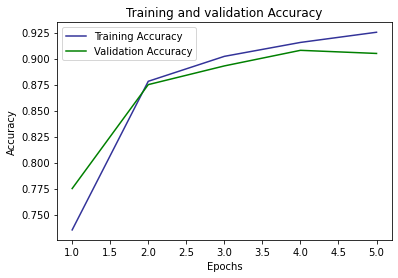

In [22]:
plot_epoch_accuracy(history.history)

Not too shabby for a *tiny* neural network! We end up with a validation accuracy of 85-90%.

Diagnosing our accuracy plot, it looks like even with more epochs, our model is failing to generalize. The dunning kruger effect in deep learning.

One solution is to give our network more nodes/neurons in our hidden layer to extract more features!

In [23]:
second_network = Sequential()
second_network.add(Dense(512, activation= "relu", input_shape=(28*28,)))
second_network.add(Dense(10, activation="softmax"))

In [24]:
second_network.compile(optimizer = 'rmsprop', 
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

In [25]:
history_two = second_network.fit(x_train_trans, 
                            y_train_trans, 
                            epochs=5, 
                            batch_size=128, 
                            validation_data=(x_val_trans, y_val_trans))

Epoch 1/5
40/40 [==============================] - 1s 16ms/step - loss: 0.6698 - accuracy: 0.8134 - val_loss: 0.4705 - val_accuracy: 0.8500
Epoch 2/5
40/40 [==============================] - 0s 10ms/step - loss: 0.3028 - accuracy: 0.9136 - val_loss: 0.3042 - val_accuracy: 0.9140
Epoch 3/5
40/40 [==============================] - 0s 11ms/step - loss: 0.2209 - accuracy: 0.9426 - val_loss: 0.4138 - val_accuracy: 0.8570
Epoch 4/5
40/40 [==============================] - 1s 14ms/step - loss: 0.1739 - accuracy: 0.9554 - val_loss: 0.3252 - val_accuracy: 0.8940
Epoch 5/5
40/40 [==============================] - 0s 12ms/step - loss: 0.1395 - accuracy: 0.9624 - val_loss: 0.2751 - val_accuracy: 0.9140


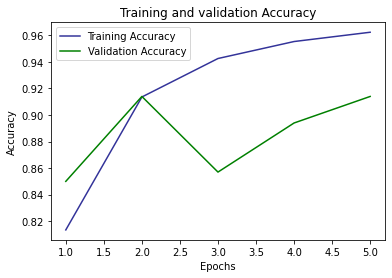

In [26]:
plot_epoch_accuracy(history_two.history)

How are you doing now?

Let's keep training this model for a few more epochs.

In [27]:
history_two_more_epochs = second_network.fit(x_train_trans, 
                            y_train_trans, 
                            epochs=10, 
                            batch_size=128, 
                            validation_data=(x_val_trans, y_val_trans))

Epoch 1/10
40/40 [==============================] - 1s 12ms/step - loss: 0.1098 - accuracy: 0.9716 - val_loss: 0.2291 - val_accuracy: 0.9220
Epoch 2/10
40/40 [==============================] - 0s 12ms/step - loss: 0.0889 - accuracy: 0.9762 - val_loss: 0.2111 - val_accuracy: 0.9290
Epoch 3/10
40/40 [==============================] - 0s 9ms/step - loss: 0.0725 - accuracy: 0.9826 - val_loss: 0.2655 - val_accuracy: 0.9120
Epoch 4/10
40/40 [==============================] - 0s 10ms/step - loss: 0.0563 - accuracy: 0.9868 - val_loss: 0.1913 - val_accuracy: 0.9450
Epoch 5/10
40/40 [==============================] - 0s 9ms/step - loss: 0.0431 - accuracy: 0.9912 - val_loss: 0.2880 - val_accuracy: 0.9070
Epoch 6/10
40/40 [==============================] - 0s 11ms/step - loss: 0.0362 - accuracy: 0.9928 - val_loss: 0.2772 - val_accuracy: 0.9170
Epoch 7/10
40/40 [==============================] - 0s 12ms/step - loss: 0.0269 - accuracy: 0.9954 - val_loss: 0.2787 - val_accuracy: 0.9290
Epoch 8/10
40/4

In [28]:
def combined_epoch_plot(history_dicts):
    """
    Combines two history dictionaries for extended epochs.
    """
    
    combined_history = {key: [] for key in history_dicts[0].keys()}
    
    for hist in history_dicts:
        for key in combined_history.keys():
            combined_history[key].extend(hist[key])
    
    return plot_epoch_accuracy(combined_history)
        
        

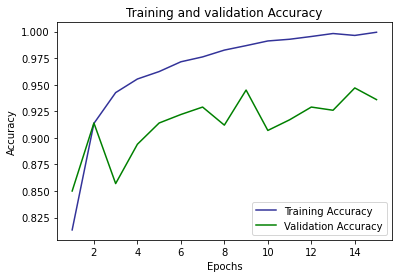

In [29]:
combined_epoch_plot([history_two.history, history_two_more_epochs.history])

In [30]:
third_network = Sequential()
third_network.add(Dense(512, activation= "relu", input_shape=(28*28,)))
third_network.add(Dense(512, activation= "relu"))
third_network.add(Dense(10, activation="softmax"))

In [31]:
third_network.compile(optimizer = 'rmsprop', 
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

In [32]:
history_two_layers = third_network.fit(x_train_trans, 
                            y_train_trans, 
                            epochs=10, 
                            batch_size=128, 
                            validation_data=(x_val_trans, y_val_trans))

Epoch 1/10
40/40 [==============================] - 1s 19ms/step - loss: 0.6686 - accuracy: 0.7888 - val_loss: 0.3993 - val_accuracy: 0.8730
Epoch 2/10
40/40 [==============================] - 1s 13ms/step - loss: 0.2740 - accuracy: 0.9162 - val_loss: 0.4697 - val_accuracy: 0.8480
Epoch 3/10
40/40 [==============================] - 1s 15ms/step - loss: 0.1577 - accuracy: 0.9518 - val_loss: 0.2020 - val_accuracy: 0.9450
Epoch 4/10
40/40 [==============================] - 1s 13ms/step - loss: 0.1152 - accuracy: 0.9642 - val_loss: 0.4727 - val_accuracy: 0.8710
Epoch 5/10
40/40 [==============================] - 1s 14ms/step - loss: 0.0765 - accuracy: 0.9776 - val_loss: 0.1458 - val_accuracy: 0.9550
Epoch 6/10
40/40 [==============================] - 0s 11ms/step - loss: 0.0570 - accuracy: 0.9832 - val_loss: 0.1757 - val_accuracy: 0.9480
Epoch 7/10
40/40 [==============================] - 0s 12ms/step - loss: 0.0355 - accuracy: 0.9896 - val_loss: 0.1965 - val_accuracy: 0.9460
Epoch 8/10
40

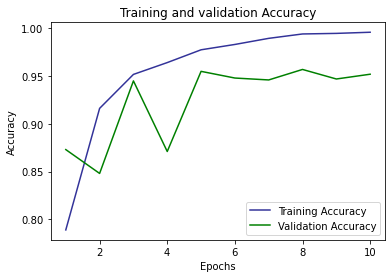

In [33]:
plot_epoch_accuracy(history_two_layers.history)

Our model is still failing to generalize and reach maximum validation accuracy!

One way we can prevent our model from overfitting is to add dropout layers.

In [34]:
fourth_network = Sequential()
fourth_network.add(Dense(512, activation= "relu", input_shape=(28*28,)))
fourth_network.add(Dropout(0.5))
fourth_network.add(Dense(512, activation= "relu"))
fourth_network.add(Dropout(0.5))
fourth_network.add(Dense(10, activation="softmax"))

In [35]:
fourth_network.compile(optimizer = 'rmsprop', 
                     loss = 'categorical_crossentropy',
                     metrics = ['accuracy'])

In [36]:
history_dropout = fourth_network.fit(x_train_trans, 
                            y_train_trans, 
                            epochs=20, 
                            batch_size=128, 
                            validation_data=(x_val_trans, y_val_trans))

Epoch 1/20
40/40 [==============================] - 2s 21ms/step - loss: 0.8946 - accuracy: 0.7148 - val_loss: 0.4285 - val_accuracy: 0.8640
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4093 - accuracy: 0.8768 - val_loss: 0.3165 - val_accuracy: 0.8970
Epoch 3/20
40/40 [==============================] - 1s 15ms/step - loss: 0.3185 - accuracy: 0.9058 - val_loss: 0.2423 - val_accuracy: 0.9230
Epoch 4/20
40/40 [==============================] - 1s 17ms/step - loss: 0.2436 - accuracy: 0.9284 - val_loss: 0.2132 - val_accuracy: 0.9270
Epoch 5/20
40/40 [==============================] - 1s 20ms/step - loss: 0.1913 - accuracy: 0.9430 - val_loss: 0.2685 - val_accuracy: 0.9160
Epoch 6/20
40/40 [==============================] - 1s 15ms/step - loss: 0.1735 - accuracy: 0.9470 - val_loss: 0.2217 - val_accuracy: 0.9310
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 0.1417 - accuracy: 0.9564 - val_loss: 0.1903 - val_accuracy: 0.9400
Epoch 8/20
40

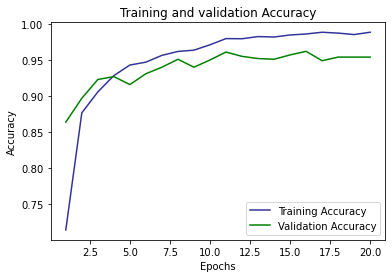

In [37]:
plot_epoch_accuracy(history_dropout.history)

## Challenge 2: Build your own neural network

1. Try training a new neural network that has a different:
    - Architecture
    - Activation Function
    - Epochs
2. How does the validation accuracy compare to the one we made?

Now that we are satisfied with this model, let's see how it performs on our holdout test set!

In [59]:
def get_model_accuracy(model, x_test, y_test):
    """
    Takes a model and a test set of data.
    Returns the accuracy.
    """
    
    score = model.evaluate(x_test, y_test, verbose=0)
    
    accuracy = round(score[1]*100, 1)
    
    return accuracy

In [60]:
get_model_accuracy(fourth_network, x_test_trans, y_test_trans)

93.6

How does this compare with our other models?

In [61]:
for i, mod in enumerate([first_network, second_network, third_network, fourth_network]):
    acc = get_model_accuracy(mod, x_test_trans, y_test_trans)
    print(f"Model {i+1} has an accuracy of {acc}%")

Model 1 has an accuracy of 88.7%
Model 2 has an accuracy of 92.0%
Model 3 has an accuracy of 92.9%
Model 4 has an accuracy of 93.6%


## Challenge 3: Evaluate your own model

Use your own model from challenge 2 to evaluate its performance on the test set!

### Visualize the test results

In [46]:
def plot_wrong_predictions(model, x_test, y_test):
    """
    Plots 25 incorrectly predicted images.
    """
    
    # Back transform images
    x_images = x_test.reshape(x_test.shape[0], 28, 28)
    
    # Format predictions and targets
    predictions = model.predict(x_test)
    predicted = np.argmax(predictions, axis=1)
    target = np.argmax(y_test, axis = 1)
    
    # Get wrong indices
    wrong_indices = np.where(predicted != target)[0]
    
    fig, axes = plt.subplots(5,5, figsize = (25,25))
    axes = axes.ravel()
    
    for ax, index in zip(axes, wrong_indices[:26]):
        ax.imshow(x_images[index], cmap=plt.cm.binary, interpolation='nearest')
        ax.set_title(f"Predicted {predicted[index]}, Actual is {target[index]}")
    
    return plt.show()

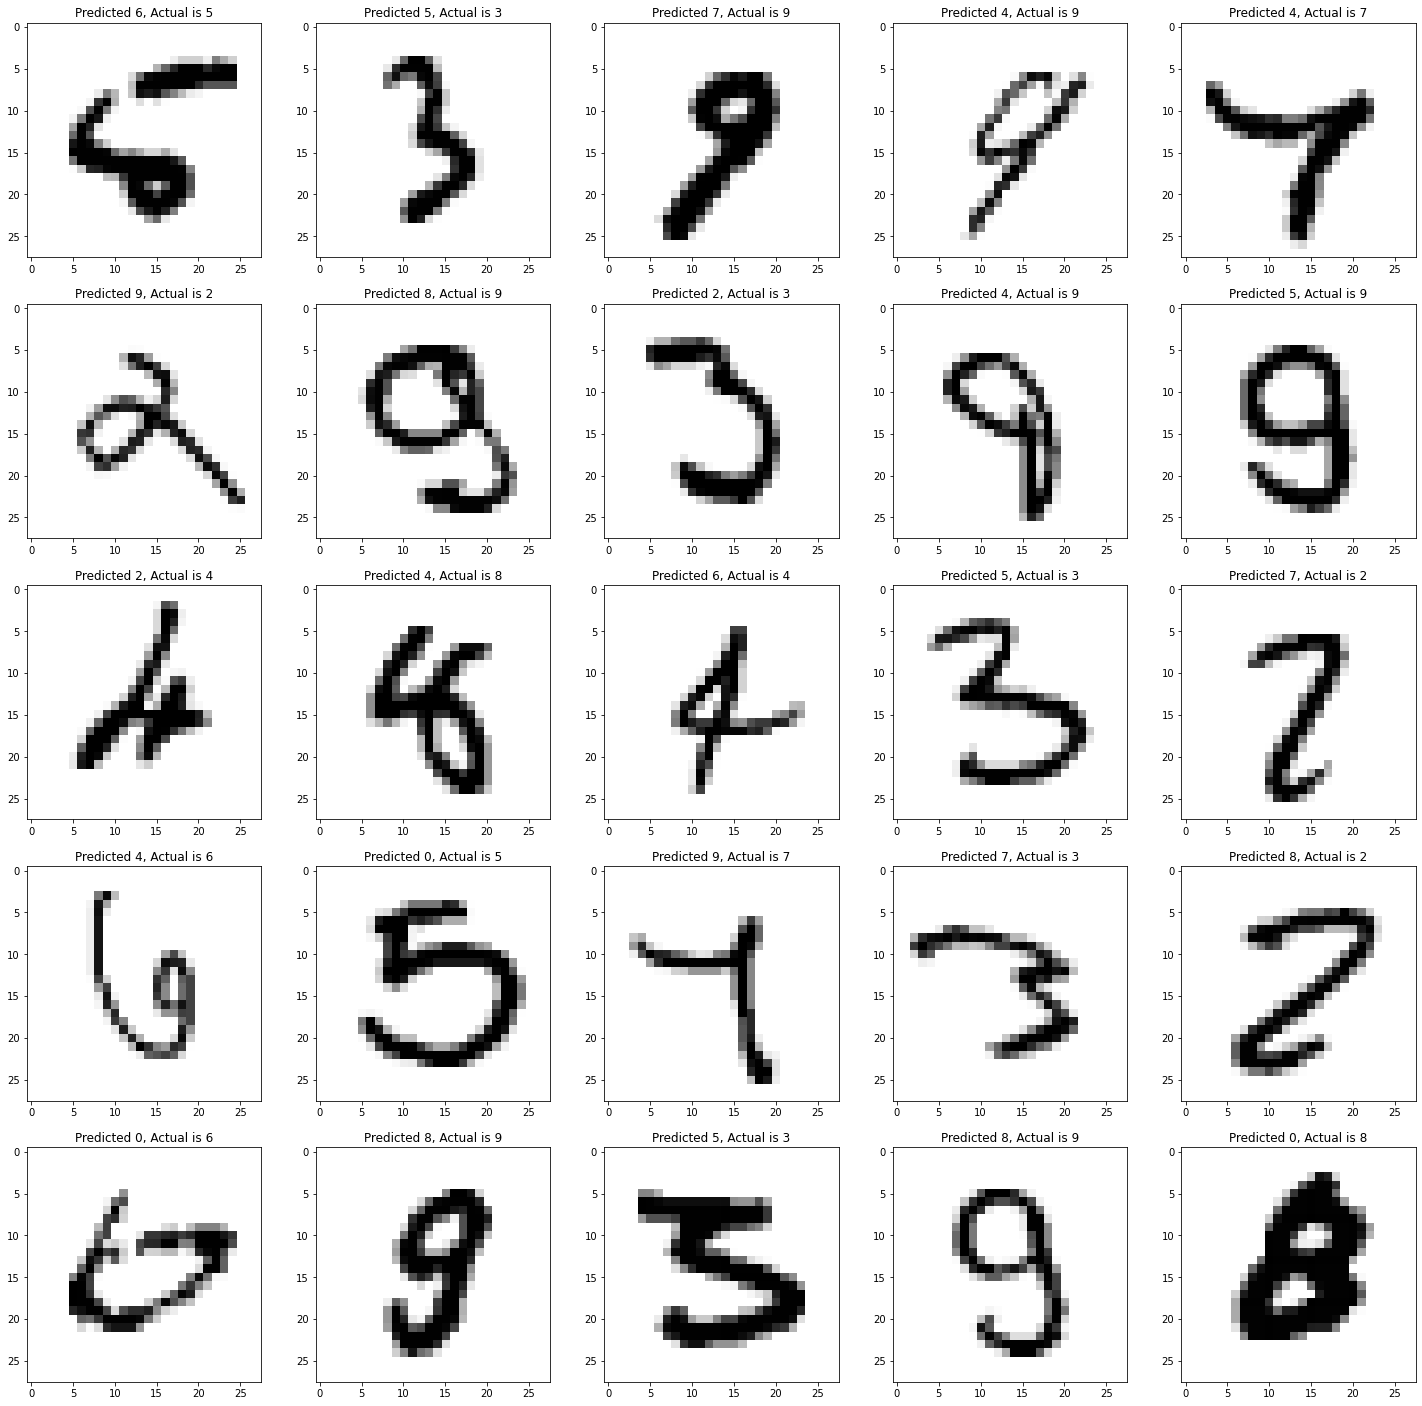

In [47]:
plot_wrong_predictions(fourth_network, x_test_trans, y_test_trans)

Do you feel our model made reasonable mistakes?

### Convolutional Neural Networks (CNNs)

The neural networks we have created so far are known as *vanilla neural networks*. 

These have many great usecases, but for problems in computer vision, we often use a different architecture called covolutional neural networks.

We will review the the details of how the work in our slides tomorrow, but for today, let's just compare their efficacy to vanilla neural nets!

In [48]:
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

In [49]:
convnet = Sequential()

convnet.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
convnet.add(MaxPooling2D((2, 2)))
convnet.add(Conv2D(64, (3, 3), activation='relu'))
convnet.add(MaxPooling2D((2, 2)))
convnet.add(Conv2D(64, (3, 3), activation='relu'))

convnet.add(Flatten())
convnet.add(Dense(64, activation='relu'))
convnet.add(Dense(10, activation='softmax'))

convnet.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Since our convnet has a *sense* of the two-dimensional image, we need to back transform our images to be two dimensional.

Why not use the original pixel data then?

We still want to keep the transformation of values between \[0, 1\].

In [50]:
def back_transform_2d(data):
    """
    Takes a list of flattened input pixel data.
    Reshapes pixel data from a single vector to two dimensions.
    """
    
    two_dimensional_data = []
    
    for d in data:
        transformed = d.reshape(d.shape[0], 28, 28, 1)
        two_dimensional_data.append(transformed)
    
    return [t for t in two_dimensional_data]
    

In [51]:
x_train_2d, x_val_2d, x_test_2d = back_transform_2d([x_train_trans, x_val_trans, x_test_trans])

In [52]:
x_train_2d.shape

(5000, 28, 28, 1)

In [53]:
history_convnet = convnet.fit(x_train_2d,
                              y_train_trans, 
                              epochs=10, 
                              batch_size=128, 
                              validation_data=(x_val_2d, y_val_trans))

Epoch 1/10
40/40 [==============================] - 3s 59ms/step - loss: 1.0267 - accuracy: 0.6722 - val_loss: 0.6717 - val_accuracy: 0.7940
Epoch 2/10
40/40 [==============================] - 2s 50ms/step - loss: 0.3522 - accuracy: 0.8924 - val_loss: 0.3659 - val_accuracy: 0.8870
Epoch 3/10
40/40 [==============================] - 2s 54ms/step - loss: 0.2282 - accuracy: 0.9300 - val_loss: 0.3894 - val_accuracy: 0.8810
Epoch 4/10
40/40 [==============================] - 3s 69ms/step - loss: 0.1709 - accuracy: 0.9474 - val_loss: 0.4150 - val_accuracy: 0.8600
Epoch 5/10
40/40 [==============================] - 2s 55ms/step - loss: 0.1255 - accuracy: 0.9622 - val_loss: 0.1480 - val_accuracy: 0.9530
Epoch 6/10
40/40 [==============================] - 2s 50ms/step - loss: 0.1055 - accuracy: 0.9664 - val_loss: 0.1237 - val_accuracy: 0.9660
Epoch 7/10
40/40 [==============================] - 2s 49ms/step - loss: 0.0813 - accuracy: 0.9742 - val_loss: 0.1249 - val_accuracy: 0.9600
Epoch 8/10
40

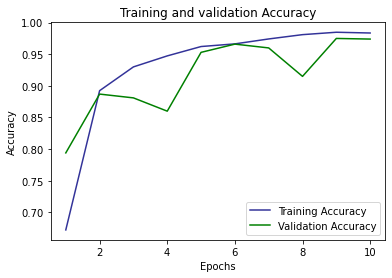

In [54]:
plot_epoch_accuracy(history_convnet.history)

So how well does our CNN perform on the test set?

In [64]:
get_model_accuracy(convnet,x_test_2d, y_test_trans)

96.9